In [1]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import json
import time

In [2]:
plt.style.use('seaborn')
# plt.rcParams['figure.figsize'] = (8,5)

In [3]:
def rounding_vector(vector, decimal=0):
    aux = []
    for item in vector:
        aux.append(round(item,decimal))
    
    return aux

In [4]:
def read_as_json(file_name):
    with open(file_name) as json_file:
        data = json.load(json_file)
    return data

In [5]:
'''The order on vectors is corresponding with evaluated groups e.g.:[G1,G2,G3,G4,G5]'''
baseline_ild = [0.9694159990485626,0.9442230039447174,0.9593941978720311,0.9354006319845902,0.97624502398981]
baseline_p10 = [0.8,0.4,0.4,0.5,0.5]

In [6]:
'''The vector for the proposal are disposed in order: [
                                                        [[G1_stan,G1_greedy,G1_random],...,[G1_stan,G1_greedy,G1_random]],
                                                        ...
                                                        [[G5_stan,G5_greedy,G5_random],...,[G5_stan,G5_greedy,G5_random]]
                                                      ]
The number of time we ran the experiment of each group was 5.'''

prop_ild = [
    [
        [0.7953019541614298, 0.9787078861191725, 0.9415961502132234],
        [0.83595627722388, 0.9794474805350205, 0.9269096165856556],
        [0.8046898441895997, 0.9786704305770814, 0.9498343426588619],
        [0.7022654150181958, 0.9680878734647854, 0.9620026451215553],
        [0.7826719901093202, 0.9647759255163505, 0.913428396728993]
    ],
    [
        [0.8867713232142258, 0.9715281467775868, 0.9628325417950339],
        [0.8867713232142258, 0.9625387435728876, 0.9544003846259438],
        [0.9032843555872834, 0.9703775775686588, 0.9703063462249915],
        [0.8867713232142257, 0.9625387435728876, 0.9518114636326479],
        [0.9032843555872834, 0.9715281467775868, 0.9337829857250093]
    ],
    [
        [0.8920139156044071, 0.966798794846502, 0.9697985676457304],
        [0.8702020419685647, 0.970747543794492, 0.8768227023395017],
        [0.8702020419685647, 0.9619970131026159, 0.9471800896121105],
        [0.8818772896713497, 0.971108625977288, 0.9550575778521848],
        [0.8337506089491183, 0.9756616313236539, 0.9340112560558589]
    ],
    [
        [0.8505838166646339, 0.9522913415950041, 0.951958549063721],
        [0.8138669593643366, 0.9705507902994455, 0.9604825088532633],
        [0.8577610904066053, 0.9509413556439898, 0.9373745661158465],
        [0.7624477228928005, 0.9318603997344501, 0.953664423885352],
        [0.8856317578764273, 0.9683581044592141, 0.9363364809443784]
    ],
    [
        [0.9148043937915583, 0.94185076469001, 0.9562622538784413],
        [0.9178876062072044, 0.942209485189788, 0.9203903595071468],
        [0.9123873254810145, 0.9430853210971428, 0.9317932765696845],
        [0.914837868893038, 0.9533031351106007, 0.9289118635298854],
        [0.8867019303506269, 0.9450310271629726, 0.9240419189104845]
    ]
]

prop_p10 = [
    [
        [0.4, 0.4, 0.4],
        [0.6, 0.6, 0.2],
        [0.4, 0.5, 0.1],
        [0.4, 0.5, 0.2],
        [0.5, 0.6, 0.3]
    ],
    [
        [0.4, 0.6, 0.3],
        [0.4, 0.6, 0.3],
        [0.4, 0.5, 0.4],
        [0.4, 0.6, 0.3],
        [0.4, 0.7, 0.4]
    ],
    [
        [0.4, 0.5, 0.3],
        [0.3, 0.5, 0.4],
        [0.3, 0.5, 0.5],
        [0.3, 0.5, 0.5],
        [0.3, 0.5, 0.1]
    ],
    [
        [0.4, 0.4, 0.1],
        [0.4, 0.5, 0.3],
        [0.5, 0.5, 0.3],
        [0.3, 0.4, 0.3],
        [0.5, 0.5, 0.3]
    ],
    [
        [0.4, 0.4, 0.3],
        [0.4, 0.4, 0.5],
        [0.5, 0.5, 0.3],
        [0.4, 0.4, 0.5],
        [0.5, 0.6, 0.6]
    ]
]

In [7]:
prop_p10_plot = []
for group in prop_p10:
    standard = []
    greedy = []
    random = []
    for run in group:
        standard.append(run[0])
        greedy.append(run[1])
        random.append(run[2])
        
    my_dict = dict()
    my_dict['m_standard'] = round(statistics.mean(standard),4)
    my_dict['m_greedy'] = round(statistics.mean(greedy),4)
    my_dict['m_random'] = round(statistics.mean(random),4)
    my_dict['std_standard'] = round(statistics.stdev(standard),4)
    my_dict['std_greedy'] = round(statistics.stdev(greedy),4)
    my_dict['std_random'] = round(statistics.stdev(random),4)
    
    prop_p10_plot.append(my_dict)
        
print(prop_p10_plot)

[{'m_standard': 0.46, 'm_greedy': 0.52, 'm_random': 0.24, 'std_standard': 0.0894, 'std_greedy': 0.0837, 'std_random': 0.114}, {'m_standard': 0.4, 'm_greedy': 0.6, 'm_random': 0.34, 'std_standard': 0.0, 'std_greedy': 0.0707, 'std_random': 0.0548}, {'m_standard': 0.32, 'm_greedy': 0.5, 'm_random': 0.36, 'std_standard': 0.0447, 'std_greedy': 0.0, 'std_random': 0.1673}, {'m_standard': 0.42, 'm_greedy': 0.46, 'm_random': 0.26, 'std_standard': 0.0837, 'std_greedy': 0.0548, 'std_random': 0.0894}, {'m_standard': 0.44, 'm_greedy': 0.46, 'm_random': 0.44, 'std_standard': 0.0548, 'std_greedy': 0.0894, 'std_random': 0.1342}]


In [38]:
with open('prop_p10.json', 'w') as json_file:  
    json.dump(prop_p10_plot, json_file)

In [8]:
print(prop_ild)

[[[0.7953019541614298, 0.9787078861191725, 0.9415961502132234], [0.83595627722388, 0.9794474805350205, 0.9269096165856556], [0.8046898441895997, 0.9786704305770814, 0.9498343426588619], [0.7022654150181958, 0.9680878734647854, 0.9620026451215553], [0.7826719901093202, 0.9647759255163505, 0.913428396728993]], [[0.8867713232142258, 0.9715281467775868, 0.9628325417950339], [0.8867713232142258, 0.9625387435728876, 0.9544003846259438], [0.9032843555872834, 0.9703775775686588, 0.9703063462249915], [0.8867713232142257, 0.9625387435728876, 0.9518114636326479], [0.9032843555872834, 0.9715281467775868, 0.9337829857250093]], [[0.8920139156044071, 0.966798794846502, 0.9697985676457304], [0.8702020419685647, 0.970747543794492, 0.8768227023395017], [0.8702020419685647, 0.9619970131026159, 0.9471800896121105], [0.8818772896713497, 0.971108625977288, 0.9550575778521848], [0.8337506089491183, 0.9756616313236539, 0.9340112560558589]], [[0.8505838166646339, 0.9522913415950041, 0.951958549063721], [0.8138

In [9]:
rounded = []
for group in prop_ild:
    block = []
    for run in group:
        block.append(rounding_vector(run,4))
    rounded.append(block)
    
print(rounded)

[[[0.7953, 0.9787, 0.9416], [0.836, 0.9794, 0.9269], [0.8047, 0.9787, 0.9498], [0.7023, 0.9681, 0.962], [0.7827, 0.9648, 0.9134]], [[0.8868, 0.9715, 0.9628], [0.8868, 0.9625, 0.9544], [0.9033, 0.9704, 0.9703], [0.8868, 0.9625, 0.9518], [0.9033, 0.9715, 0.9338]], [[0.892, 0.9668, 0.9698], [0.8702, 0.9707, 0.8768], [0.8702, 0.962, 0.9472], [0.8819, 0.9711, 0.9551], [0.8338, 0.9757, 0.934]], [[0.8506, 0.9523, 0.952], [0.8139, 0.9706, 0.9605], [0.8578, 0.9509, 0.9374], [0.7624, 0.9319, 0.9537], [0.8856, 0.9684, 0.9363]], [[0.9148, 0.9419, 0.9563], [0.9179, 0.9422, 0.9204], [0.9124, 0.9431, 0.9318], [0.9148, 0.9533, 0.9289], [0.8867, 0.945, 0.924]]]


In [10]:
prop_ild_plot = []
for group in rounded:
    standard = []
    greedy = []
    random = []
    for run in group:
        standard.append(run[0])
        greedy.append(run[1])
        random.append(run[2])
        
    my_dict = dict()
    my_dict['m_standard'] = round(statistics.mean(standard),4)
    my_dict['m_greedy'] = round(statistics.mean(greedy),4)
    my_dict['m_random'] = round(statistics.mean(random),4)
    my_dict['std_standard'] = round(statistics.stdev(standard),4)
    my_dict['std_greedy'] = round(statistics.stdev(greedy),4)
    my_dict['std_random'] = round(statistics.stdev(random),4)
    
    prop_ild_plot.append(my_dict)
        
print(prop_ild_plot)

[{'m_standard': 0.7842, 'm_greedy': 0.9739, 'm_random': 0.9387, 'std_standard': 0.0498, 'std_greedy': 0.0069, 'std_random': 0.0191}, {'m_standard': 0.8934, 'm_greedy': 0.9677, 'm_random': 0.9546, 'std_standard': 0.009, 'std_greedy': 0.0047, 'std_random': 0.0137}, {'m_standard': 0.8696, 'm_greedy': 0.9693, 'm_random': 0.9366, 'std_standard': 0.022, 'std_greedy': 0.0051, 'std_random': 0.0358}, {'m_standard': 0.8341, 'm_greedy': 0.9548, 'm_random': 0.948, 'std_standard': 0.0475, 'std_greedy': 0.0157, 'std_random': 0.0107}, {'m_standard': 0.9093, 'm_greedy': 0.9451, 'm_random': 0.9323, 'std_standard': 0.0128, 'std_greedy': 0.0047, 'std_random': 0.0141}]


In [42]:
with open('prop_ild.json', 'w') as json_file:  
    json.dump(prop_ild_plot, json_file)

In [11]:
baseline_ild = rounding_vector(baseline_ild,4)
print(baseline_ild)

[0.9694, 0.9442, 0.9594, 0.9354, 0.9762]


Text(0.5, 1.0, 'Baseline performance on ILD metric')

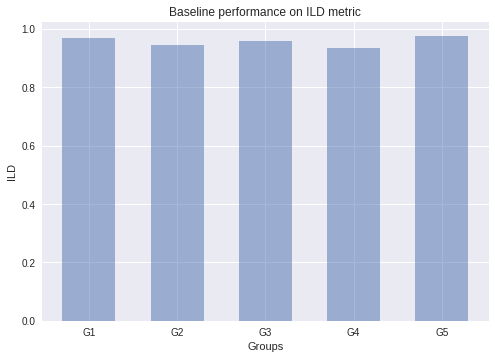

In [12]:
objects = ('G1', 'G2', 'G3', 'G4', 'G5')
y_pos = np.arange(len(objects))
values_ild = baseline_ild

plt.bar(y_pos, values_ild, width=0.6, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('ILD')
plt.xlabel('Groups')
plt.title('Baseline performance on ILD metric')

In [13]:
prop_ild = read_as_json('prop_ild.json')
prop_ild

[{'m_standard': 0.7842,
  'm_greedy': 0.9739,
  'm_random': 0.9387,
  'std_standard': 0.0498,
  'std_greedy': 0.0069,
  'std_random': 0.0191},
 {'m_standard': 0.8934,
  'm_greedy': 0.9677,
  'm_random': 0.9546,
  'std_standard': 0.009,
  'std_greedy': 0.0047,
  'std_random': 0.0137},
 {'m_standard': 0.8696,
  'm_greedy': 0.9693,
  'm_random': 0.9366,
  'std_standard': 0.022,
  'std_greedy': 0.0051,
  'std_random': 0.0358},
 {'m_standard': 0.8341,
  'm_greedy': 0.9548,
  'm_random': 0.948,
  'std_standard': 0.0475,
  'std_greedy': 0.0157,
  'std_random': 0.0107},
 {'m_standard': 0.9093,
  'm_greedy': 0.9451,
  'm_random': 0.9323,
  'std_standard': 0.0128,
  'std_greedy': 0.0047,
  'std_random': 0.0141}]

In [14]:
m_standard = []
m_greedy = []
m_random = []
std_standard = []
std_greedy = []
std_random = []
for group in prop_ild:
    m_standard.append(group['m_standard'])
    m_greedy.append(group['m_greedy'])
    m_random.append(group['m_random'])
    std_standard.append(group['std_standard'])
    std_greedy.append(group['std_greedy'])
    std_random.append(group['std_random'])
    
print(m_standard, m_greedy, m_random)

[0.7842, 0.8934, 0.8696, 0.8341, 0.9093] [0.9739, 0.9677, 0.9693, 0.9548, 0.9451] [0.9387, 0.9546, 0.9366, 0.948, 0.9323]


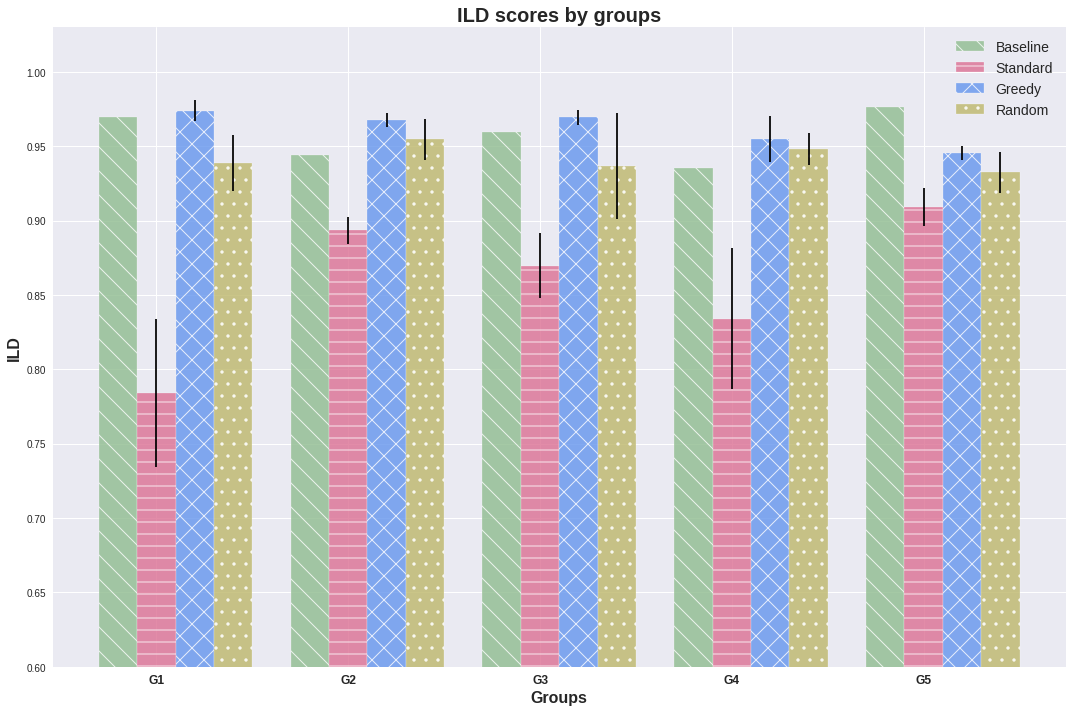

In [33]:
plt.rcParams['figure.figsize'] = (15,10)

# data to plot
n = 5
baseline_ild
m_standard
m_greedy
m_random
std_standard
std_greedy
std_random

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.8

line1 = plt.bar(index, baseline_ild, bar_width, alpha=opacity, color='darkseagreen', label='Baseline', hatch="\\", edgecolor='white')
line2 = plt.bar(index + bar_width, m_standard, bar_width, alpha=opacity, color='palevioletred', yerr=std_standard,  label='Standard', hatch="-", edgecolor='white')
line3 = plt.bar(index + bar_width + bar_width, m_greedy, bar_width, alpha=opacity, color='cornflowerblue', yerr=std_greedy, label='Greedy', hatch="x", edgecolor='white')
line4 = plt.bar(index + bar_width + bar_width + bar_width, m_random, bar_width, alpha=opacity, color='darkkhaki', yerr=std_random, label='Random', hatch=".", edgecolor='white')


plt.xlabel('Groups', fontweight="bold", fontsize=16)
plt.ylabel('ILD', fontweight="bold", fontsize=16)
plt.title('ILD scores by groups', fontweight="bold", fontsize=20)
plt.xticks(index + bar_width, ('G1', 'G2', 'G3', 'G4', 'G5'), fontweight="bold", fontsize="12")

plt.legend(fontsize=14)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.6,None])

plt.tight_layout()
plt.show()

In [34]:
m_standard = []
m_greedy = []
m_random = []
for group in prop_p10_plot:
    m_standard.append(group['m_standard'])
    m_greedy.append(group['m_greedy'])
    m_random.append(group['m_random'])
    
print(m_standard, m_greedy, m_random)

[0.46, 0.4, 0.32, 0.42, 0.44] [0.52, 0.6, 0.5, 0.46, 0.46] [0.24, 0.34, 0.36, 0.26, 0.44]


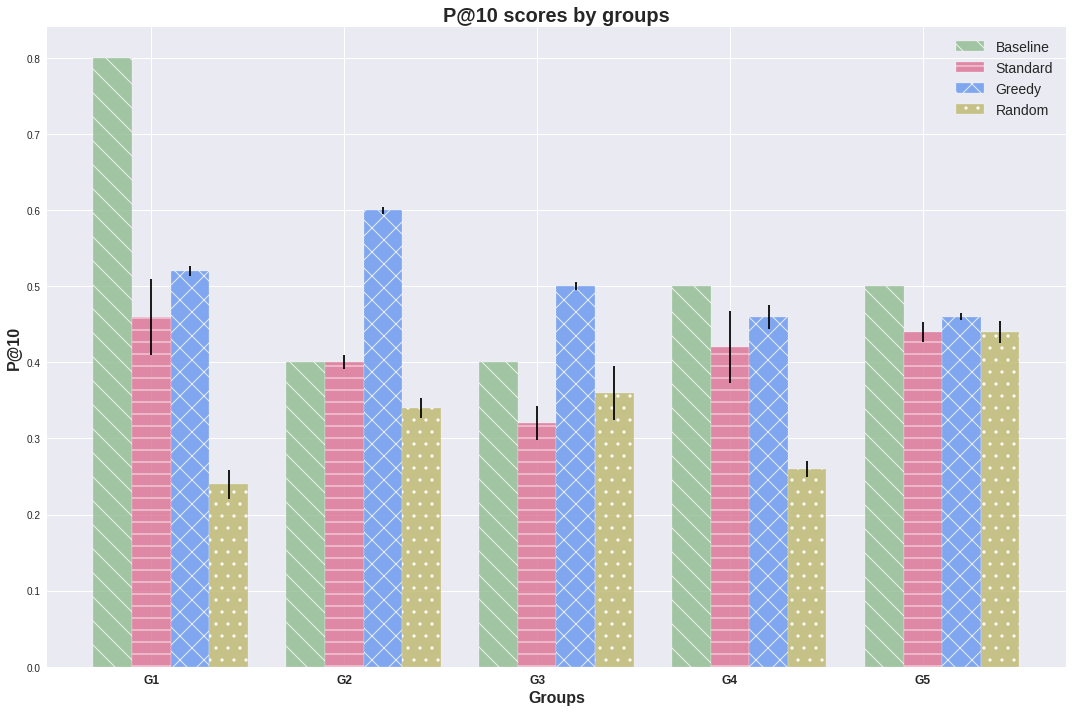

In [37]:
plt.rcParams['figure.figsize'] = (15,10)

# data to plot
n = 5
baseline_p10
m_standard
m_greedy
m_random

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.8

line1 = plt.bar(index, baseline_p10, bar_width, alpha=opacity, color='darkseagreen', label='Baseline', hatch="\\", edgecolor='white')
line2 = plt.bar(index + bar_width, m_standard, bar_width, alpha=opacity, color='palevioletred', yerr=std_standard,  label='Standard', hatch="-", edgecolor='white')
line3 = plt.bar(index + bar_width + bar_width, m_greedy, bar_width, alpha=opacity, color='cornflowerblue', yerr=std_greedy, label='Greedy', hatch="x", edgecolor='white')
line4 = plt.bar(index + bar_width + bar_width + bar_width, m_random, bar_width, alpha=opacity, color='darkkhaki', yerr=std_random, label='Random', hatch=".", edgecolor='white')


plt.xlabel('Groups', fontweight="bold", fontsize=16)
plt.ylabel('P@10', fontweight="bold", fontsize=16)
plt.title('P@10 scores by groups', fontweight="bold", fontsize=20)
plt.xticks(index + bar_width, ('G1', 'G2', 'G3', 'G4', 'G5'), fontweight="bold", fontsize="12")

plt.legend(fontsize=14)

# axes = plt.gca()
# # axes.set_xlim([xmin,xmax])
# axes.set_ylim([0.6,None])

plt.tight_layout()
plt.show()